In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/weatherHistory.csv')

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


In [3]:
print("\nFirst few rows:")
df.head()


First few rows:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


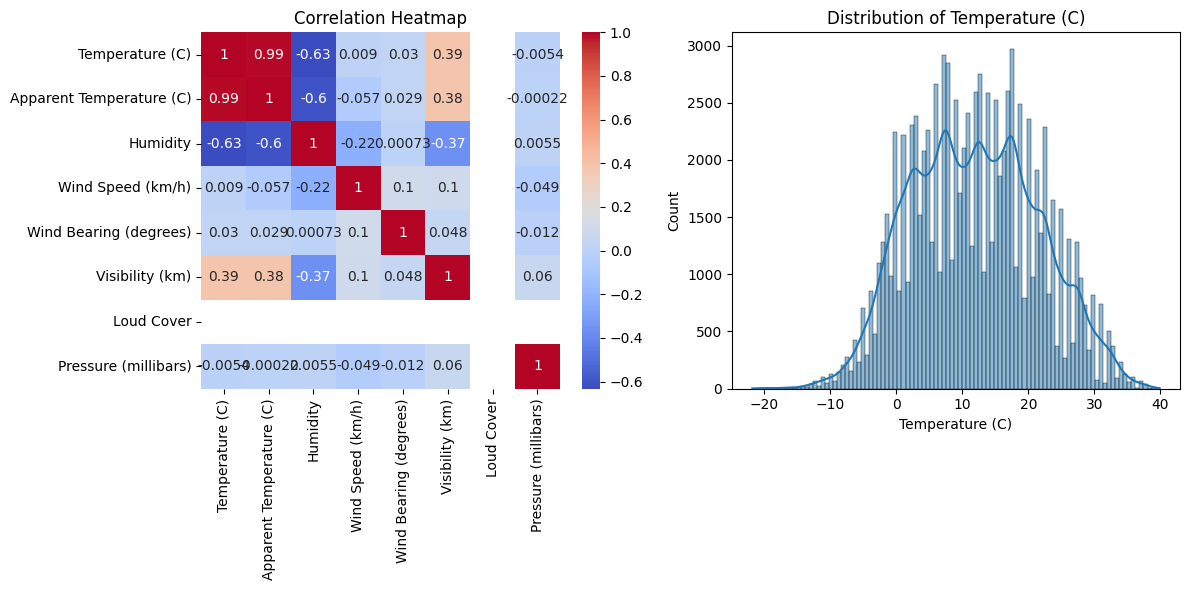

In [4]:
# Create some basic visualizations
plt.figure(figsize=(12, 6))

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 1:
    plt.subplot(1, 2, 1)
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')

# Create a distribution plot for the first numeric column
if len(numeric_cols) > 0:
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=numeric_cols[0], kde=True)
    plt.title(f'Distribution of {numeric_cols[0]}')

plt.tight_layout()
plt.show()

In [5]:
df = df[['Formatted Date','Temperature (C)']]

df.head(10)

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556
5,2006-04-01 05:00:00.000 +0200,9.222222
6,2006-04-01 06:00:00.000 +0200,7.733333
7,2006-04-01 07:00:00.000 +0200,8.772222
8,2006-04-01 08:00:00.000 +0200,10.822222
9,2006-04-01 09:00:00.000 +0200,13.772222


In [6]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True).dt.strftime('%Y-%m-%d')

df.head(10)


,Formatted Date,Temperature (C)
0,2006-03-31,9.472222
1,2006-03-31,9.355556
2,2006-04-01,9.377778
3,2006-04-01,8.288889
4,2006-04-01,8.755556
5,2006-04-01,9.222222
6,2006-04-01,7.733333
7,2006-04-01,8.772222
8,2006-04-01,10.822222
9,2006-04-01,13.772222


In [7]:
df = df.drop_duplicates(subset=['Formatted Date'], keep='first')

print("\nAfter keeping one record per day:")

df.head(10)


After keeping one record per day:


,Formatted Date,Temperature (C)
0,2006-03-31,9.472222
2,2006-04-01,9.377778
24,2006-04-09,10.422222
26,2006-04-10,11.183333
50,2006-04-11,8.633333
74,2006-04-12,7.311111
98,2006-04-13,5.438889
122,2006-04-14,8.338889
146,2006-04-15,11.027778
170,2006-04-16,10.827778


In [8]:
sequence = df['Temperature (C)'].to_numpy()

sequence.shape

(4019,)

In [9]:
import numpy as np

def create_seq2seq_pairs(sequence, input_len=8, output_len=8):
    X, y = [], []
    total_len = input_len + output_len
    for i in range(len(sequence) - total_len + 1):
        X.append(sequence[i:i + input_len])
        y.append(sequence[i + input_len:i + total_len])
    return np.array(X), np.array(y)

X, y = create_seq2seq_pairs(sequence)

print("Inputs (X):", X.shape)
print(X[:3])
print("Outputs (y):", y.shape)
print(y[:3])

Inputs (X): (4004, 8)
[[ 9.47222222  9.37777778 10.42222222 11.18333333  8.63333333  7.31111111
   5.43888889  8.33888889]
 [ 9.37777778 10.42222222 11.18333333  8.63333333  7.31111111  5.43888889
   8.33888889 11.02777778]
 [10.42222222 11.18333333  8.63333333  7.31111111  5.43888889  8.33888889
  11.02777778 10.82777778]]
Outputs (y): (4004, 8)
[[11.02777778 10.82777778  8.97777778 13.01111111 10.40555556  8.72222222
  12.15555556  9.43888889]
 [10.82777778  8.97777778 13.01111111 10.40555556  8.72222222 12.15555556
   9.43888889  9.86111111]
 [ 8.97777778 13.01111111 10.40555556  8.72222222 12.15555556  9.43888889
   9.86111111 10.25      ]]


In [10]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nTest shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Train shapes:
X_train: (3203, 8)
y_train: (3203, 8)

Test shapes:
X_test: (801, 8)
y_test: (801, 8)


#### Loading the model & single batch overfitting to verify if model is learning

In [21]:
import RNN

RNN_MODEL = RNN.RNN(X_train)

RNN_MODEL.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 8, 64)          │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 8, 1)           │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
RNN_MODEL.fit(X_train[0:1], y_train[0:1], epochs=500, batch_size=1, verbose=0)

loss = RNN_MODEL.evaluate(X_train[:1], y_train[:1])

print(f"Loss of single batch overfitting is {loss} ≈ 0")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9843e-12
Loss of single batch overfitting is 2.9842794901924208e-12 ≈ 0


Loss Almost equal to 0 representing model is learning now wee can pass the complete data

#### Training the actual model

In [35]:
RNN_MODEL = RNN.RNN(X_train)

RNN_MODEL.fit(X_train, y_train, epochs = 500, batch_size=32, validation_split=0.1)

Epoch 1/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 90.8974 - val_loss: 55.6833
Epoch 2/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.1311 - val_loss: 45.4318
Epoch 3/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.9556 - val_loss: 41.7085
Epoch 4/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.9510 - val_loss: 40.4171
Epoch 5/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.5827 - val_loss: 39.7931
Epoch 6/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.6280 - val_loss: 39.7104
Epoch 7/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.2550 - val_loss: 39.2758
Epoch 8/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.9235 - val_loss: 40.0037
Epoch 9/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.6671 - val_loss: 38.9201
Epoch 10/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.2745 - val_loss: 38.8045
Epoch 11/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.6959 - val_loss: 39.2154
Epoch 12/500
91/91 ━━━━━━━━━━━━━━━━━━━━ 0

In [36]:
loss = RNN_MODEL.evaluate(X_test, y_test)

print(f"Testing loss of trained model is {loss}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.2846
Testing loss of trained model is 39.67798614501953


In [37]:
pred = RNN_MODEL.predict(X_test[:1])

pred, y_test[:1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


(array([[[ 2.5796402],
         [ 3.3757055],
         [ 5.0312567],
         [ 6.178276 ],
         [11.607495 ],
         [13.843429 ],
         [11.458968 ],
         [12.162729 ]]], dtype=float32),
 array([[ 6.08333333,  6.42222222,  6.17777778,  7.99444444,  6.76111111,
          9.77777778,  9.63333333, 11.56111111]]))